# 1.The Data

On s'intéresse ici au profil de lancement, nous prendrons donc pour chaque produit les 16 semaines suivant la première vente.

In [6]:
product_df_full.head()

,Product,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,3.6E+101_2,-0.94,-0.60,0.21,1.23,1.87,1.70,1.23,0.64,0.26,-0.34,-0.72,-0.98,-0.94,-0.89,-0.85,-0.89
1,31C000963_2,-1.00,-0.30,0.70,1.79,1.90,1.54,0.78,0.27,-0.16,-0.49,-0.70,-0.84,-0.88,-0.88,-0.87,-0.86
2,31C002201_2,-1.25,-1.20,-1.05,-0.50,0.33,1.30,1.73,1.64,1.12,0.64,0.26,-0.05,-0.37,-0.68,-0.90,-1.02
3,31C002300_2,-2.14,-1.15,0.34,1.73,1.85,1.22,0.31,-0.22,-0.50,-0.64,-0.64,-0.59,-0.38,-0.01,0.32,0.49
4,31C002400_2,-1.52,-1.41,-1.06,-0.41,0.34,0.87,0.99,1.16,1.29,1.45,0.96,0.30,-0.39,-0.73,-0.88,-0.98


# 2. Principal Components Analysis

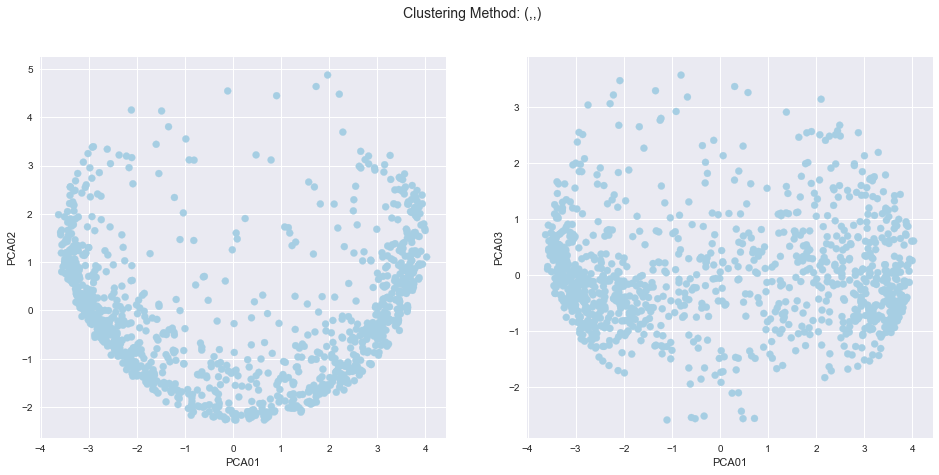

[ 0.64119541  0.18178163  0.0896043   0.04412872  0.02282775]


In [10]:
X_pca= pca.transform(X)

### PCA 01

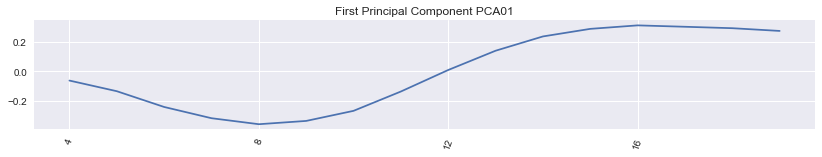

### PCA 02

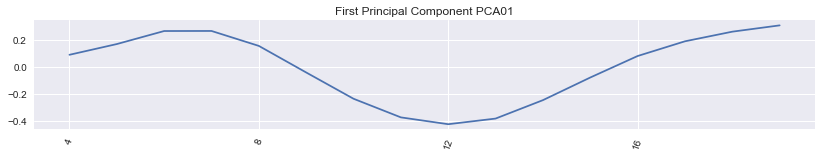

### PCA 03

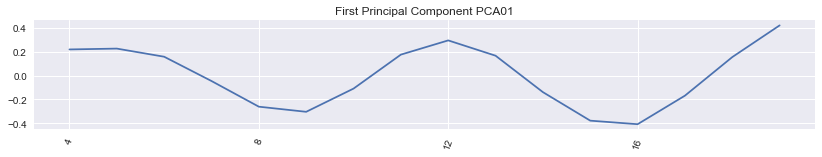

### PCA 04

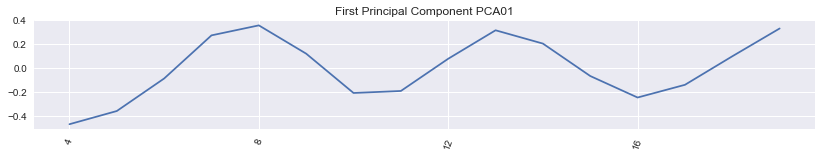

# 3. Clustering

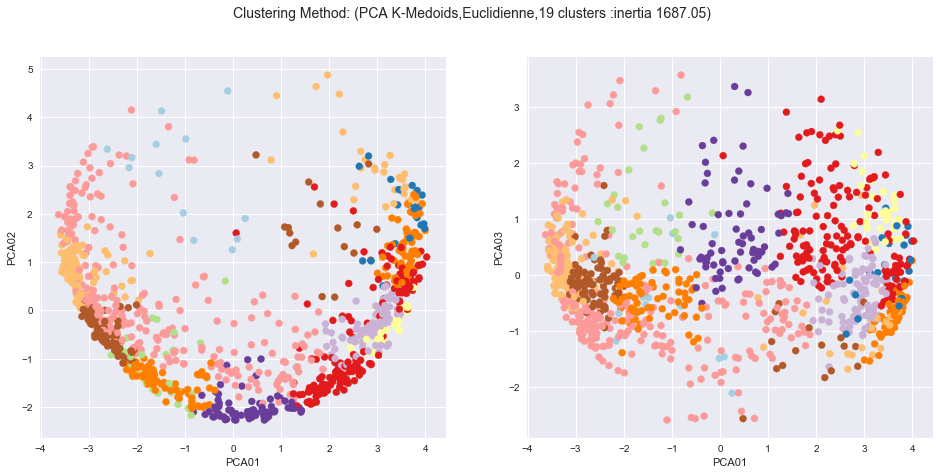

In [9]:
label, medoids_euc = kMedoids.cluster(euclid_distance,k= n_cluster)

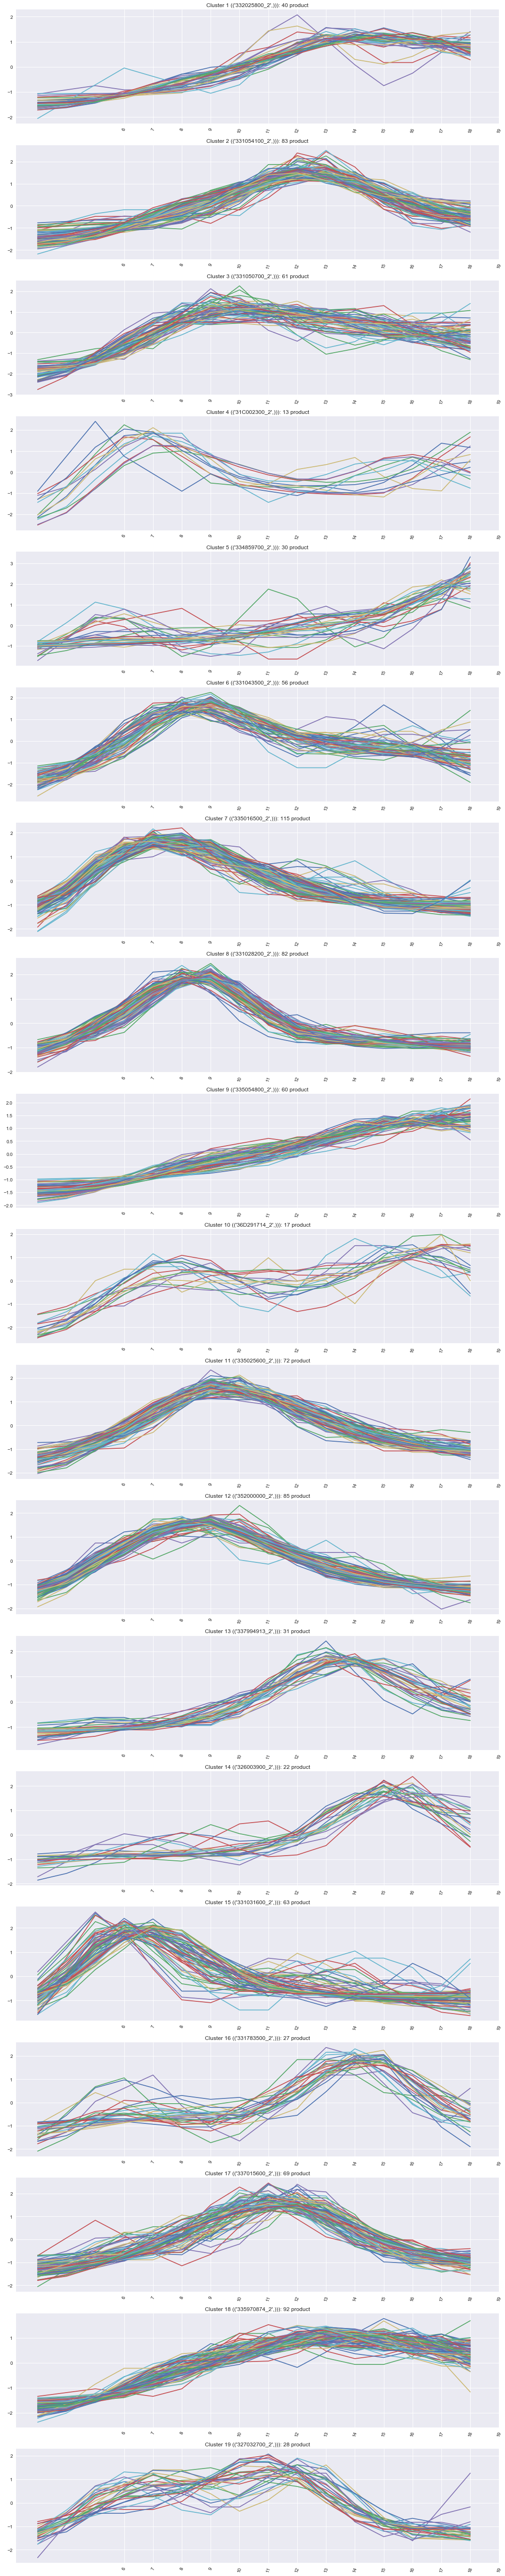

In [23]:
carr = hlp.Cluster_series_plot(data_df = product_df_full, cluster_df = eucl_df,headers = row_headers,tick_frequency = 1)

# 4. Exploring Clustering Results

In [158]:
product_cluster.head(2)

,Key_lvl1,Key_lvl2,Key_lvl3,Key_lvl4,Key_lvl5,Key_lvl6,Base Price 1 Target Value,Color,Size,Gender,Year of Commodity,Launch Date,Tag Price,Sales Season,Age Group,Cluster,Centroid
0,31C0009635602,31C000963_2,Female - One-piece pants inside - Thin - $29,Female - One Internal Pants - Thin,Female - One-piece pants,Female,29.00,Black,Sheer,No Gender,2016,05/10/2016,29.00,Autumn,29-38,15,335030700_2
1,31C0022017000,31C002201_2,Female - One-piece pants inside - Thin - $29,Female - One Internal Pants - Thin,Female - One-piece pants,Female,29.00,Gray,No Size,No Gender,2016,08/09/2016,29.00,Autumn,18-28,13,338980000_2


## Feature Engineering
Extract features from the keys which are more reliable and fill missing values, convert price, make launch date relative to the season

In [164]:
df.head()

,Color,Size,Launch Date,Age Group,Person,Product,Ptype,Price,Cluster
Product,,,,,,,,,
31C000963_2,Black,Sheer,3,29-38,Female,One-Piece Pants Inside,Thin,$29,15
31C002201_2,Gray,No Size,-1,18-28,Female,One-Piece Pants Inside,Thin,$29,13
31C002300_2,Black,Sheer,6,29-38,Female,One-Piece Pants Inside,Thin,$29,4
31C002400_2,Black,Sheer,0,29-38,Female,One-Piece Pants Inside,Thin,$39,5
31C002500_2,Black,Sheer,0,18-28,Female,One-Piece Pants Inside,Thin,$29,9


## MCA on features

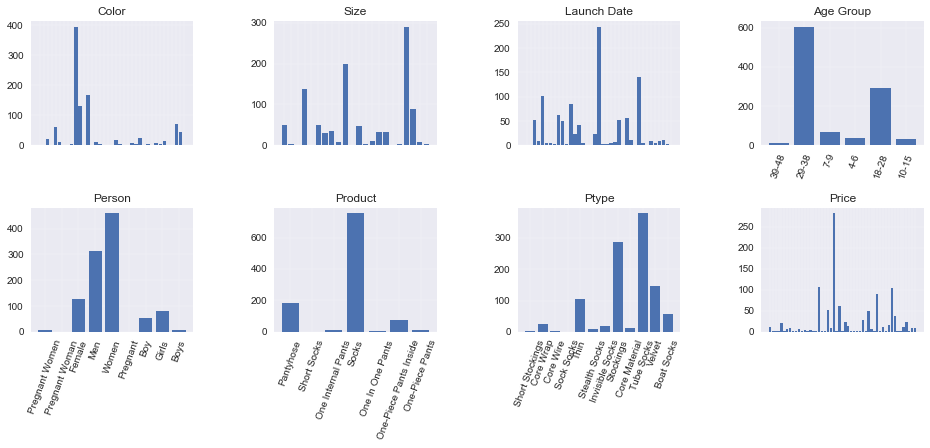

In [249]:
features_df = df.fillna("Na").drop("Cluster",axis=1).copy()

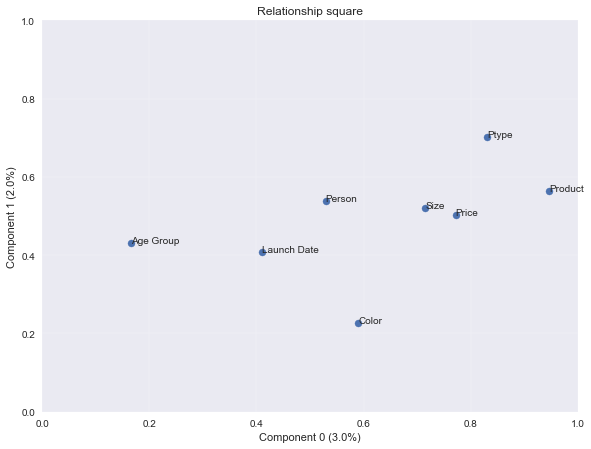

In [265]:
#mca = prince.MCA(features_df)
mca.plot_relationship_square()

# Homogeneity Tests
In order to detect specific caraterstics for each resulted cluster we perform a statistic test based on Pearsons chi-square score with the hypothesis of a uniform distribution.

Features with the pvalues lower than 0.1 are displayed for analysis

### Cluster 11 is "Tube Socks" group

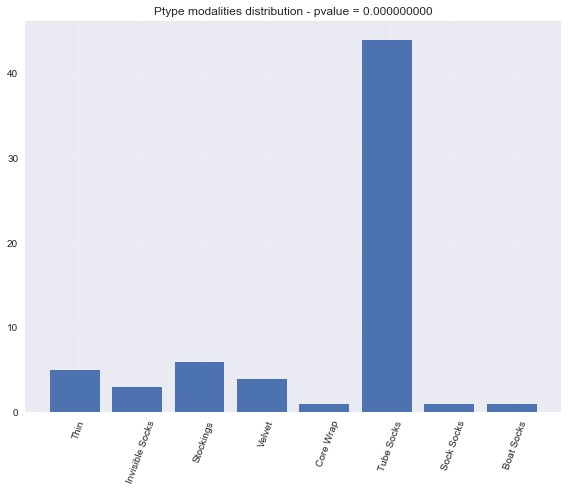

In [168]:
features = ["Ptype"]
clusters = [11]

### Other colors for cluster 19

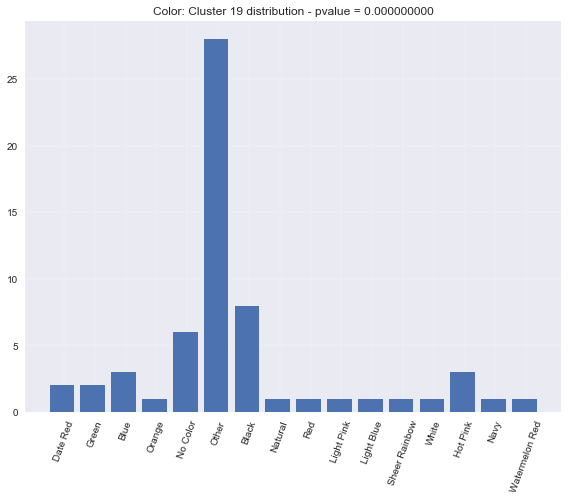

In [292]:
cluster = [19]
features = ["Color"]

# Classification 
Different classifiers are tried out: MLP, SVM, KNN, Decision Tree and random forests. The accuracy/precision is nearly the same accross the 5 of them. We keep the last one for **robustness** and **features significance**.

In [294]:
classifier = RandomForestClassifier(n_estimators=200)
Dummyclassifier = DummyClassifier()

### Decision Trees:  Example

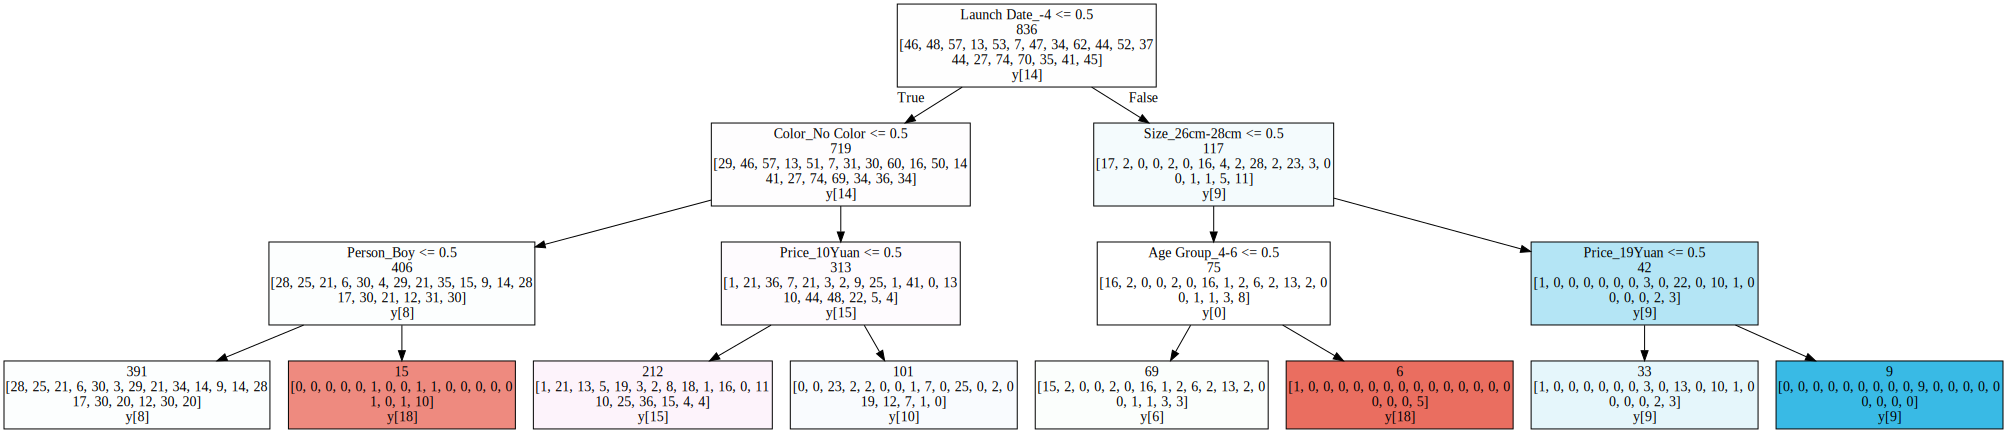

In [366]:
display(SVG(graph.pipe(format='svg')))

## Standard evaluation metrics of the algorithm

In [304]:
print(train_classification_report)
print(test_classification_report)

Train 
avg / total       0.74      0.73      0.73       836

Test 
avg / total       0.33      0.31      0.31       210



## RMSE evaluation
In this section we look at **"how far"** the referent of the predicted cluster is from the actual series, since we're interested in the "profile" of sales.

Furthermore, we will consider the 4 first predicted clusters and perform the same evaluation. It could be possible that **after few weeks** of sales the affectation of the right profile could **be adjusted**.

### The 4 best predictions

In [307]:
full_series.head()

,PC1,PC2,PC3,PC4,PR1,PR2,PR3,PR4,Cluster,Centroid,...,10,11,12,13,14,15,16,17,18,19
Product,,,,,,,,,,,,,,,,,,,,,
31C180301_2,9,5,1,16,331028600_2,326901900_2,331995271_2,331023300_2,4,328956467_2,...,67.78,62.89,60.44,59.56,62.00,81.78,100.67,116.44,99.78,74.89
31C999902_2,15,9,5,2,335030700_2,331028600_2,326901900_2,335043401_2,15,335030700_2,...,28.67,9.11,4.89,4.00,2.67,2.00,1.11,0.67,3.11,10.67
31C999914_2,19,7,5,2,345018600_2,335057700_2,326901900_2,335043401_2,12,331052900_2,...,607.33,714.89,765.56,807.11,837.11,850.22,879.11,970.44,"1,114.22","1,155.56"
325001400_2,7,15,14,5,335057700_2,335030700_2,335322901_2,326901900_2,15,335030700_2,...,0.89,1.11,1.33,1.11,0.89,0.44,0.44,0.44,0.67,0.67
325028700_2,15,2,4,11,335030700_2,335043401_2,328956467_2,335026000_2,13,338980000_2,...,14.44,13.56,12.22,10.22,8.44,5.33,3.11,2.89,3.11,2.89


### Alternative evaluation method

In [368]:
display(results)

32.38 have less than 70% correlation between predicted and actual series


34.29 Not in Top 4 guesses


,Mean,Std,Range,RMSE,PRMSE,CORR
Product,,,,,,
327600001_2,1.17,0.31,1.11,0.53,0.67,0.44
337861803_2,381.54,518.84,"1,562.00",0.19,0.49,-0.74
331057500_2,655.44,321.55,"1,097.11",0.15,0.46,-0.30
337006001_2,853.08,954.01,"2,484.44",0.18,0.45,-0.71
325716200_2,4.44,2.37,7.33,0.14,0.45,-0.43


### Bad prediction adjusted after 2 weeks

,PC1,PC2,PC3,PC4,PR1,PR2,PR3,PR4,Cluster,Centroid,...,10,11,12,13,14,15,16,17,18,19
Product,,,,,,,,,,,,,,,,,,,,,
326608300_2,14,17,18,5,335322901_2,335013800_2,331053700_2,326901900_2,4,328956467_2,...,1.33,1.33,1.78,1.33,1.33,0.89,1.56,1.78,2.22,1.33


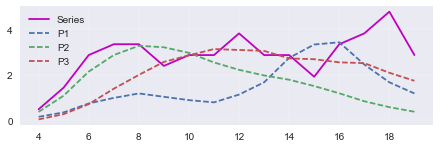

In [324]:
display(disp.head())

### Feature Importance in classification

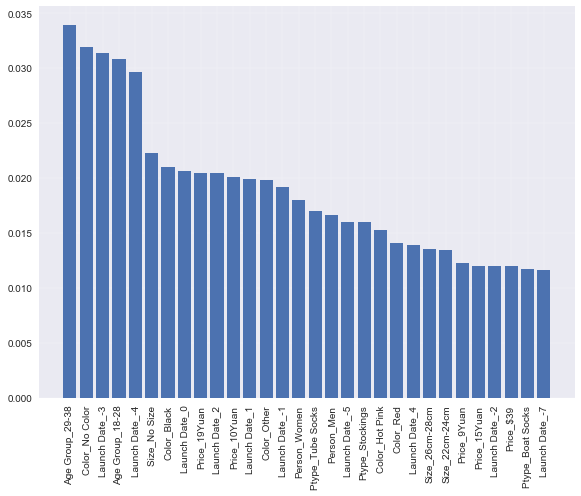

In [327]:
fi = classifier.feature_importances_

## Next Steps
- Improve data prepartion process (products selection ignore irrelevant data)
- Fine tune model with automated model selection
- More features Engineering
- Improve the detection algorithm
- **Predict quantities** by estimating the mean and std from the first sales